<a href="https://colab.research.google.com/github/bubulubii/IAyRN-2024/blob/main/Actividades/RNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Actividad 6:** Redes Neuronales. **Alumna:** María Fernanda Ramos Campos **Matrícula:** 2109376 **Hora clase:** N4

**Descripción de la actividad:** Entrenamiento de un modelo de Red Neuronal Convolucional. Utilizando el conjunto de datos MNIST, la red neuronal identificará imágenes de baja resolución de dígitos del 0 al 9.

In [1]:
# 1. Importamos las librerías a utilizar.
import tensorflow as tf
import numpy as np #para la generación de arreglos y números aleatorios.
import matplotlib.pyplot as plt #para graficar.

In [3]:
# 2. Importamos funciones a trabajar.
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical

In [4]:
# 3. Importamos el conjunto de datos MNIST.
mnist = keras.datasets.mnist

     #Separamos en conjunto de entrenamiento y de prueba.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [24]:
# 4. Incluimos y almacenamos los Class Names.
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
# 5. Revisamos y nos aseguramos de la estructura del set de datos.
print(train_images.shape)
len(train_labels)

(60000, 28, 28)


60000

In [7]:
print(train_labels)
print(test_images.shape)
len(test_labels)

[5 0 4 ... 5 6 8]
(10000, 28, 28)


10000

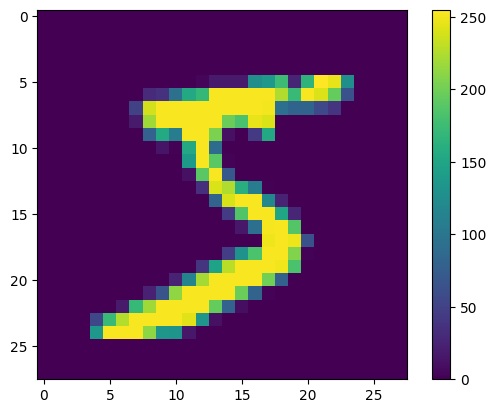

In [8]:
# 6. Iniciamos el pre-procesamiento de datos.

  # Nos aseguramos de que el rango de los valores de los pixeles sea correcto (0-255).

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Escalamos los valores de pixeles para que se ajuste la escala de 0 a 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

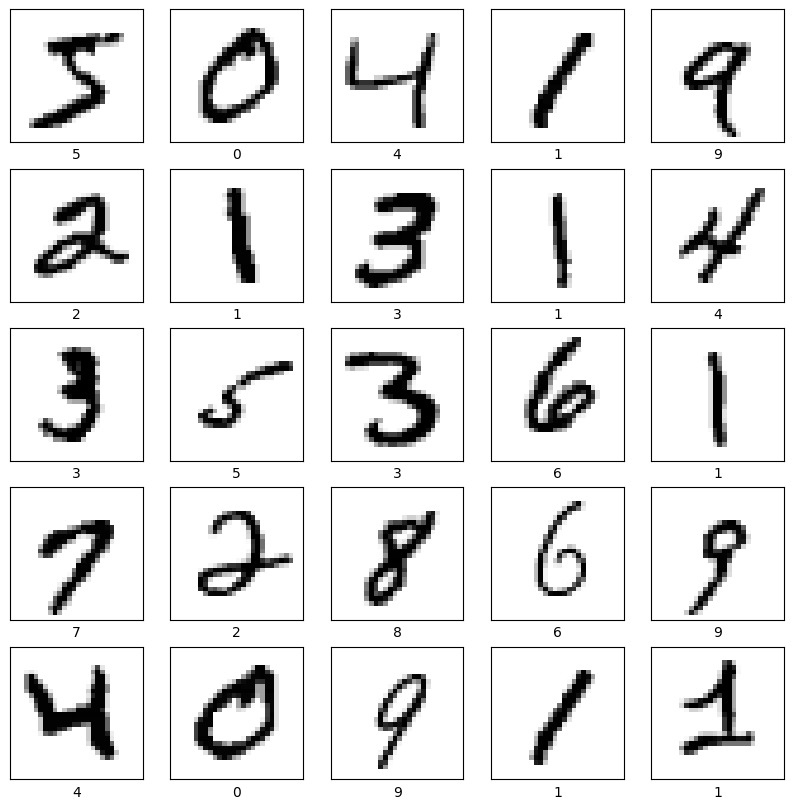

In [10]:
 # Mostramos las primeras 25 imágenes del Training Setg para verificar el formato del set de datos.
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
# 7. Comenzamos con la configuración de capas del modelo.
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu')), #Capa conteniendo 128 neuronas.
model.add(Dense(10, activation='softmax')) #Capa softmax (función de activación de capa de salida) de 10 neuronas (al ser diez clases)

In [12]:
# 8. Ya teniendo sus capas, compilamos el modelo, agregando configuraciones necesarias.

    # Separamos para tener datos de validación.
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)
    #Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])  #Métrica a utilizar (exactitud) para evaluar el proceso de entrenamiento.

In [13]:
# Comenzamos el entrenamiento con el método fit, que ajusta al set de datos de training.
history = model.fit(train_images, train_labels, epochs=8, validation_data=(val_images, val_labels))

Epoch 1/8
1500/1500 [==============================] - 62s 40ms/step - loss: 0.1417 - accuracy: 0.9567 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 2/8
1500/1500 [==============================] - 50s 34ms/step - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0459 - val_accuracy: 0.9864
Epoch 3/8
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0492 - val_accuracy: 0.9853
Epoch 4/8
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0225 - accuracy: 0.9924 - val_loss: 0.0489 - val_accuracy: 0.9871
Epoch 5/8
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0160 - accuracy: 0.9949 - val_loss: 0.0408 - val_accuracy: 0.9889
Epoch 6/8
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0118 - accuracy: 0.9960 - val_loss: 0.0399 - val_accuracy: 0.9887
Epoch 7/8
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0113 - accuracy: 0.9960 - val_loss: 0.0350 - val_ac

In [25]:
# Obtuvimos exactitud del 99.75%, luego de diez épocas de ajuste. La pérdida fue de 00.80%.
 #Para la etapa de validación fueron 99.02% y 04.61% respectivamente.

# 11. Procedemos a evaluar la exactitud del modelo, comparando rendimiento con el set de datos.

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc * 100, '%')

313/313 - 2s - loss: 0.0335 - accuracy: 0.9917 - 2s/epoch - 8ms/step

Test accuracy: 99.16999936103821 %


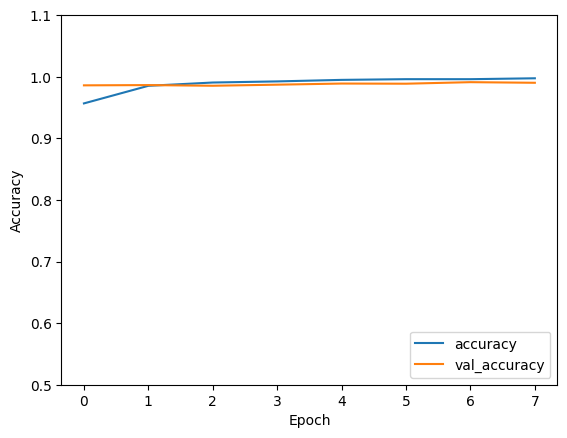

In [23]:
# Comprobamos que la exactitud del set de datos fue de 99.16%, y la pérdida disminuyó a 0.0335%.
# Este ligero aumento indica que aún hubo sobreajuste/ overfitting.
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.1])
plt.legend(loc='lower right')

plt.show()

In [16]:
# 12. Continuamos con establecer el uso del modelo para predecir imágenes.
predictions = model.predict(test_images)
predictions[0] #Solicitamos la primera predicción.

#Obtenemos el valor máximo de confianza de la predicción.
np.argmax(predictions[0])

313/313 [==============================] - 4s 12ms/step


7

In [17]:
# Esta predicción nos indica que el modelo detecta mayor probabilidad de que sea la clase 7 = número 7.
   # Comprobamos que la predicción es correcta.
test_labels[0]

7

In [18]:
# 13. Procedemos a graficar para ver el set de predicción.

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green' # El color de la predicción es verde si es correcta.
  else:
    color = 'red' # Color rojo si es lo contrario.

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)



In [19]:
 # Definimos a la función que nos va a graficar la confianza que se tiene en el porcentaje de predicción.
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red') # El color de la predicción será azul.
    thisplot[true_label].set_color('green') # El color de la verdadera etiqueta será verde.

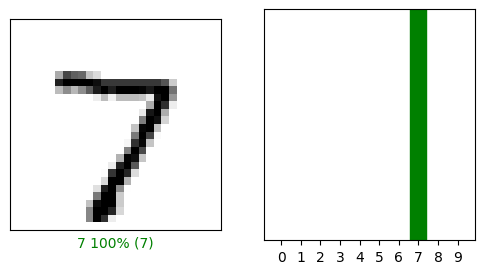

In [20]:
# Solicitamos al set de predicción la información de la primera imagen.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

313/313 [==============================] - 3s 10ms/step


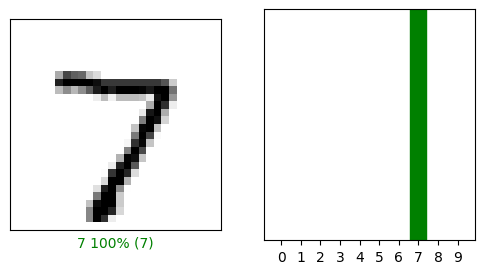

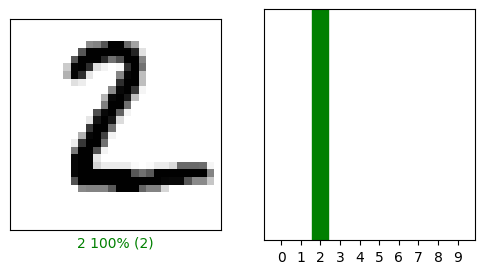

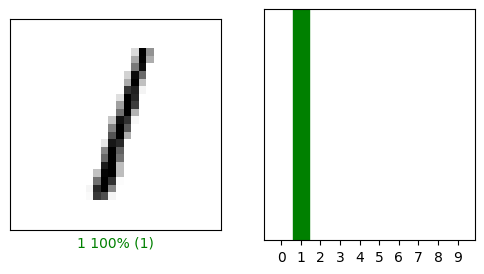

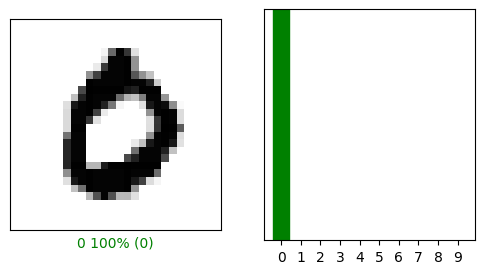

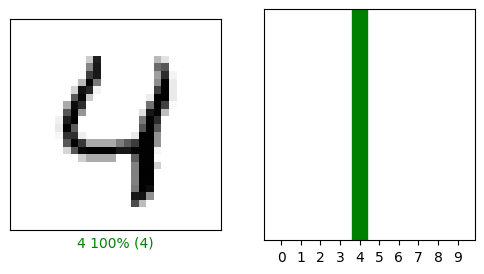

In [21]:
# Finalmente, solicitamos las 5 primeras predicciones, comparando valor esperado con real.

predictions = model.predict(test_images)
for i in range(5):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i, predictions[i],  test_labels)
    plt.show()



---



# **Responde las siguientes preguntas:**

***¿Cuántas épocas usaste para mejorar el rendimiento del modelo en comparación con la red neuronal prealimentada de la actividad 5?***

En la **actividad 5**, hice **uso de 10 épocas** de entrenamiento. Para esta actividad, hice una **prueba con 10 épocas** igualmente, mas se seguía presentando un **ligero sobreajuste**.

*En ese primer caso, obtuve una exactitud del 99.39%, luego de diez épocas de ajuste. La pérdida fue de 02.07%. Para la etapa de validación fueron 98.63% y 07.58% respectivamente. Al evaluar la exactitud del modelo, comparando rendimiento con el set de datos, observé que la exactitud del set de datos fue de 98.75%.* **La diferencia fue de 0.64%**

Para intentar corregirlo, decidí hacer una **segunda prueba**, **reduciendo el número de épocas a 8**.

*Al realizar lo anterior, obtuve una exactitud del 99.75%, luego de las ocho épocas de ajuste y con pérdida de 00.80%. Para la etapa de validación fueron 99.02% y 04.61% respectivamente. Como comprobación, evalué la exactitud del modelo para comparar el rendimiento con el set de datos, y el resultado fue (como se observó en líneas pasadas) de 99.16%.*

Si bien aún se presentó sobreajuste, me resultó destacable que ahora **la diferencia era de 0.59%**, por lo que también este disminuyó. Esto pudo verse más claramente en las gráficas elaboradas para comparar ambos resultados.

Al intentar hacer una tercera prueba, con 5 épocas de entrenamiento, los valores que obtuve fueron: Exactitud de 99.44%, pérdida de 01.63%. Para la etapa de validación, 98.62% y 04.67% respectivamente. Al final, la exactitud del set de datos fue de 98.61%, y la pérdida disminuyó a 04.29%. Igual hubo sobreajuste, pero en esta ocasión fue mayor. Observé que de la primer a la tercer época, la exactitud mejoró, pero de la tercera a la quinta, esta disminuyó.

Debido a tales resultados, decidí quedarme con las 8 épocas de entrenamiento, para hacer entrega de la actividad.





***¿Obtuviste un mejor rendimiento con este modelo o con el de la actividad 5? ¿Por qué?***

**El mejor rendimiento para validación, lo obtuve con este modelo.**
En el de la actividad 5, los datos pasaron de 99.49% y 97.69% para la validación con 10 épocas, a 97.67% de exactitud real. Para esta actividad, en las 3 pruebas realizadas, la exactitud fue mejor que para la actividad 5, sin embargo, el mejor resultado me lo proporcionaron las 8 épocas de entrenamiento.
Llego a esta conclusión ya que, si bien en los 4 casos (3 de la actividad 6 y 1 de la actividad 5) hubo sobreajuste, **con las 8 épocas de entrenamiento la exactitud fue mayor, sin bajar del 99%.**

Sabemos que **el sobreajuste indica que la red neuronal no está generalizando correctamente**, pues también captura ruido y variaciones peculiares en los datos que recibe. El modelo se entrenó de más en los datos específicos, lo que lo volvió muy especializado, llegando al punto en que no es lo suficientemente preciso.

En la primera prueba, la diferencia entre la exactitud del entrenamiento y la validación indicó sobreajuste, y aunque la exactitud es alta en ambos casos, la mayor pérdida en validación indica que el modelo no generaliza bien.
Reducir las épocas de entrenamiento a 8 mejoró la situación, disminuyendo ligeramente el sobreajuste y aumentando la exactitud en validación. Posteriormente, y aunque se redujo el número de épocas aún más, el sobreajuste se hizo más evidente. La exactitud en validación disminuyó, mostrando que menos épocas de entrenamiento no siempre resultan en una mejor generalización.



